<a href="https://colab.research.google.com/github/Mr-RAKSHIT-2004-GUPTA/Rigression/blob/main/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing
data= fetch_california_housing()

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
df = df.sample(frac = 0.20)#taking 20 percent for our case

In [ ]:
df.shape

(4128, 9)

In [ ]:
X = df.drop('target', axis = 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train , y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([3.757  , 0.7    , 3.766  , 4.167  , 0.939  , 2.395  , 1.175  ,
       1.656  , 1.537  , 1.808  , 2.435  , 2.165  , 4.922  , 1.633  ,
       0.813  , 1.65   , 1.016  , 0.325  , 0.767  , 0.544  , 0.886  ,
       5.00001, 3.025  , 1.633  , 0.528  , 3.167  , 0.973  , 1.152  ,
       1.957  , 0.797  , 0.513  , 1.165  , 1.2    , 3.24   , 0.972  ,
       1.137  , 5.00001, 1.183  , 1.548  , 0.481  , 0.738  , 2.591  ,
       1.794  , 1.688  , 1.62   , 0.845  , 1.167  , 1.566  , 4.167  ,
       1.379  , 1.547  , 0.628  , 1.94   , 1.967  , 1.063  , 2.575  ,
       1.903  , 1.762  , 5.00001, 1.149  , 1.856  , 1.447  , 1.431  ,
       2.346  , 3.431  , 0.736  , 3.412  , 1.082  , 1.982  , 2.583  ,
       0.622  , 1.89   , 1.381  , 1.923  , 2.124  , 1.223  , 2.862  ,
       2.247  , 3.347  , 0.982  , 2.533  , 1.143  , 1.854  , 1.767  ,
       0.952  , 1.855  , 1.194  , 1.597  , 3.118  , 1.842  , 2.387  ,
       1.688  , 1.594  , 1.524  , 1.61   , 1.438  , 3.106  , 2.314  ,
       0.786  , 0.66

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.5995773862997579
R-squared: 0.5605357422332615


In [ ]:
#hyperparameter tuning
param = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
regressor = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = regressor, param_grid = param, cv = 5, n_jobs = None, scoring = 'neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
final_model = DecisionTreeRegressor(criterion = 'poisson', max_depth = 6, max_features = 'log2', splitter = 'best')

In [ ]:
final_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='log2')

[Text(0.5085685483870968, 0.9285714285714286, 'x[0] <= 4.577\npoisson = 0.3\nsamples = 3302\nvalue = 2.048'),
 Text(0.25806451612903225, 0.7857142857142857, 'x[0] <= 2.723\npoisson = 0.21\nsamples = 2393\nvalue = 1.657'),
 Text(0.3833165322580645, 0.8571428571428572, 'True  '),
 Text(0.12903225806451613, 0.6428571428571429, 'x[6] <= 34.475\npoisson = 0.164\nsamples = 983\nvalue = 1.247'),
 Text(0.06451612903225806, 0.5, 'x[7] <= -118.295\npoisson = 0.141\nsamples = 460\nvalue = 1.469'),
 Text(0.03225806451612903, 0.35714285714285715, 'x[3] <= 1.198\npoisson = 0.167\nsamples = 90\nvalue = 2.067'),
 Text(0.016129032258064516, 0.21428571428571427, 'x[5] <= 2.531\npoisson = 0.12\nsamples = 80\nvalue = 1.982'),
 Text(0.008064516129032258, 0.07142857142857142, 'poisson = 0.125\nsamples = 22\nvalue = 2.493'),
 Text(0.024193548387096774, 0.07142857142857142, 'poisson = 0.086\nsamples = 58\nvalue = 1.789'),
 Text(0.04838709677419355, 0.21428571428571427, 'x[5] <= 1.6\npoisson = 0.428\nsamples =

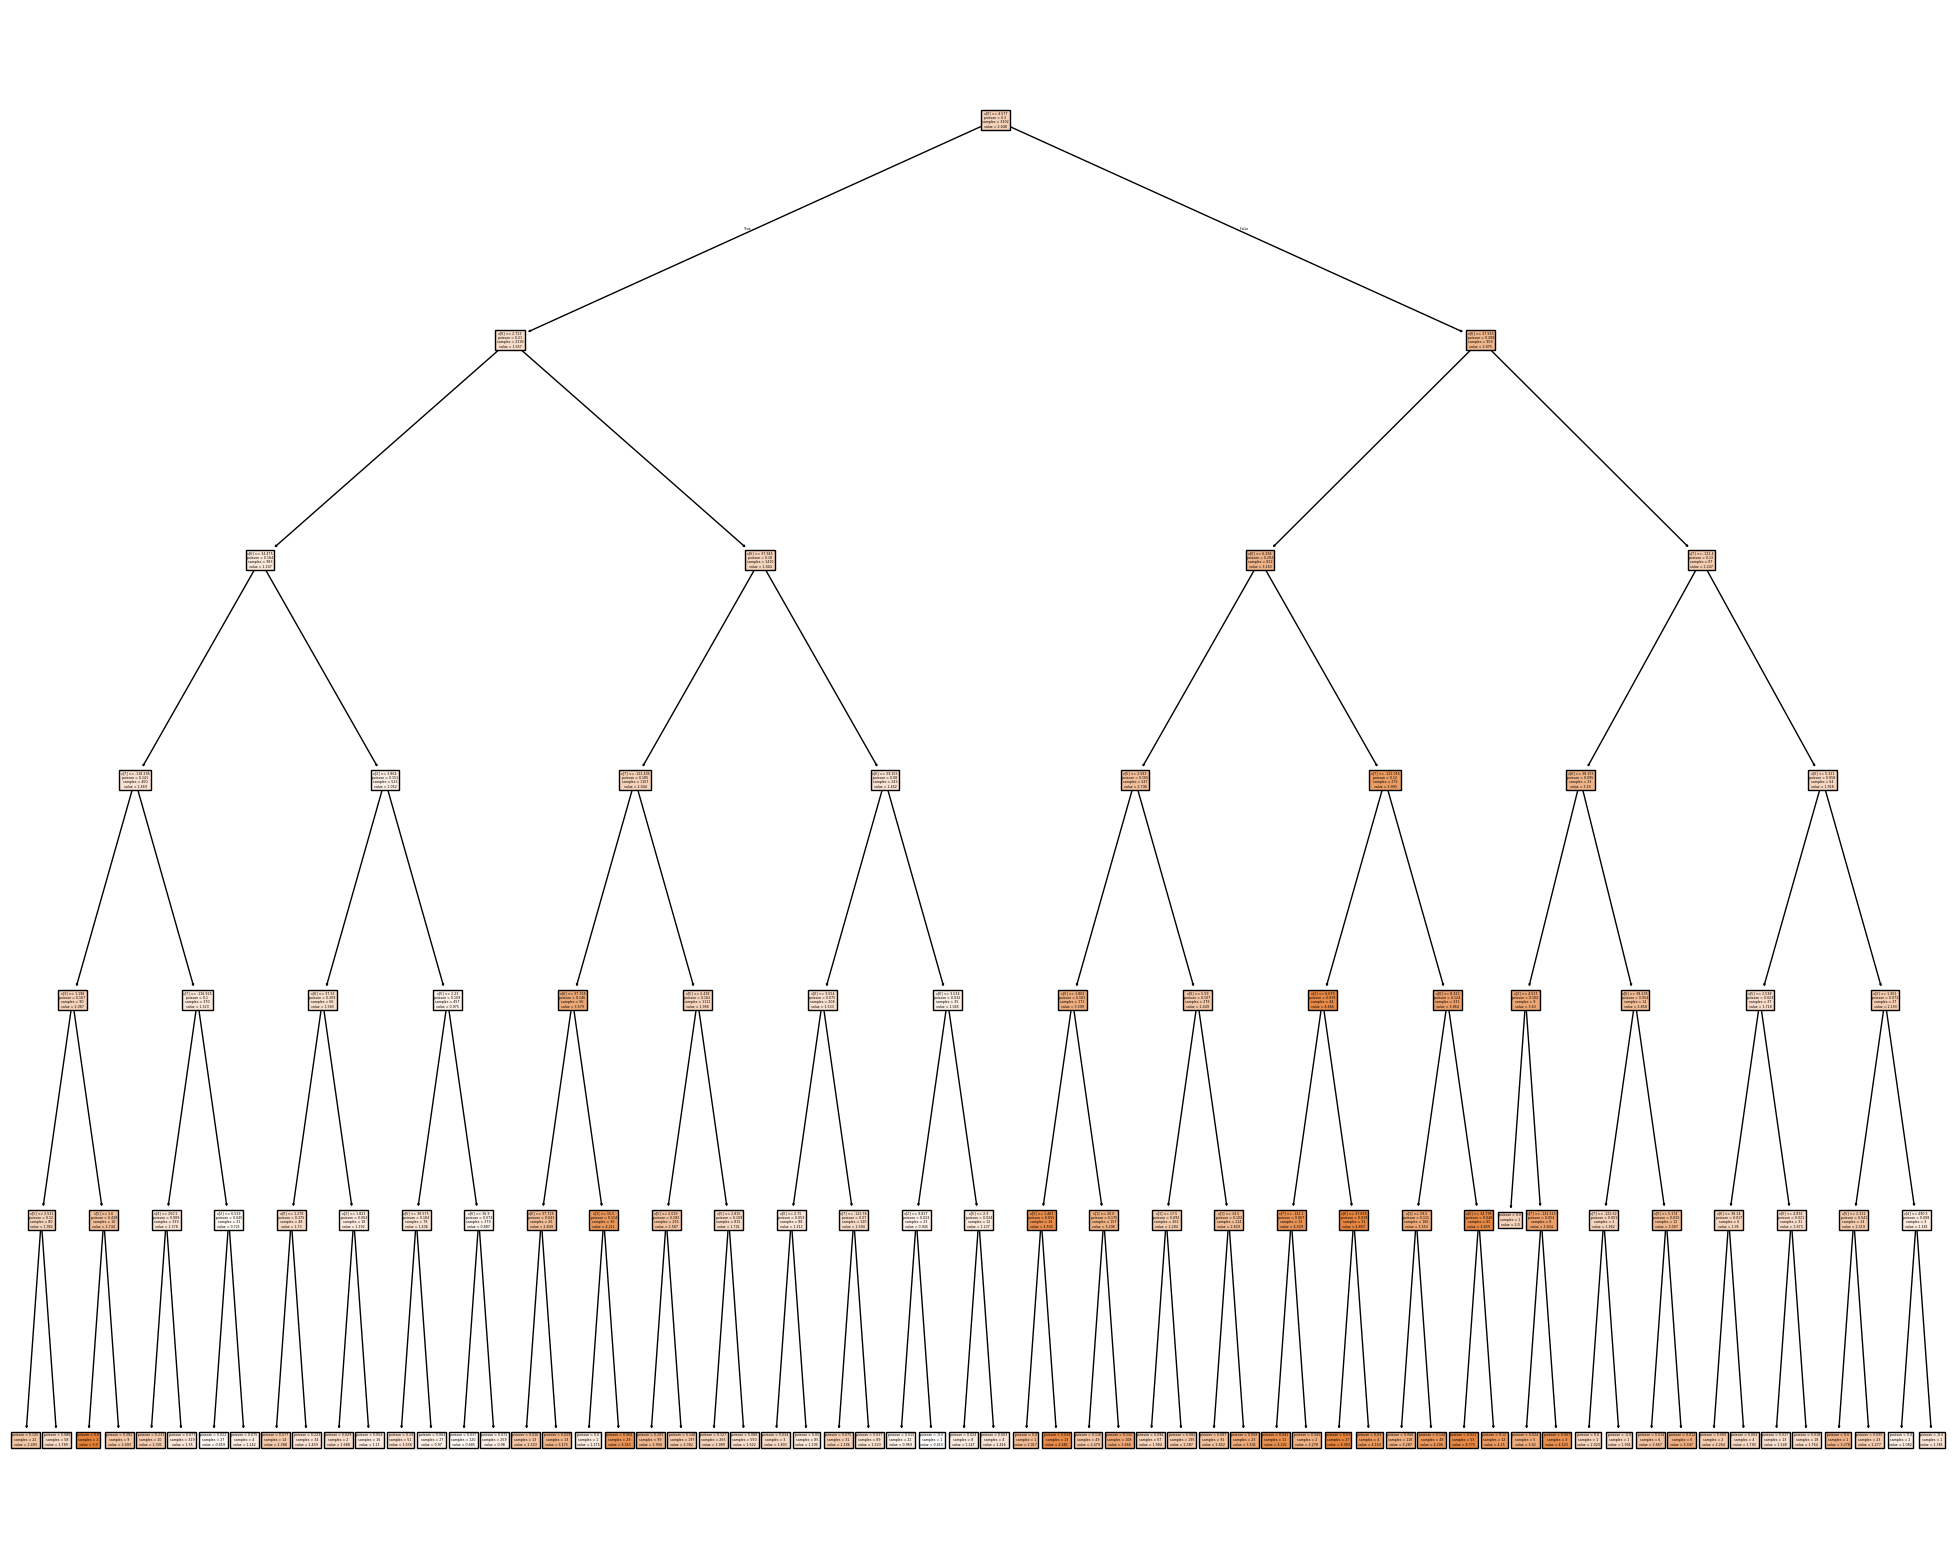

In [ ]:
from sklearn import tree
plt.figure(figsize = (25,20))
tree.plot_tree(final_model,filled = True)